# Decision Tree

About the data: <br>
Let’s consider a Company dataset with around 10 variables and 400 records. <br>
The attributes are as follows: <br>
 Sales -- Unit sales (in thousands) at each location<br>
 Competitor Price -- Price charged by competitor at each location<br>
 Income -- Community income level (in thousands of dollars)<br>
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)<br>
 Population -- Population size in region (in thousands)<br>
 Price -- Price company charges for car seats at each site<br>
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site<br>
 Age -- Average age of the local population<br>
 Education -- Education level at each location<br>
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location<br>
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not<br>
The company dataset looks like this: <br>
 
Problem Statement:<br>
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. <br>
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


# EDA

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [6]:
data = pd.read_csv('Company_data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
data.shape

(400, 11)

In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [11]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [12]:
data['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Education')

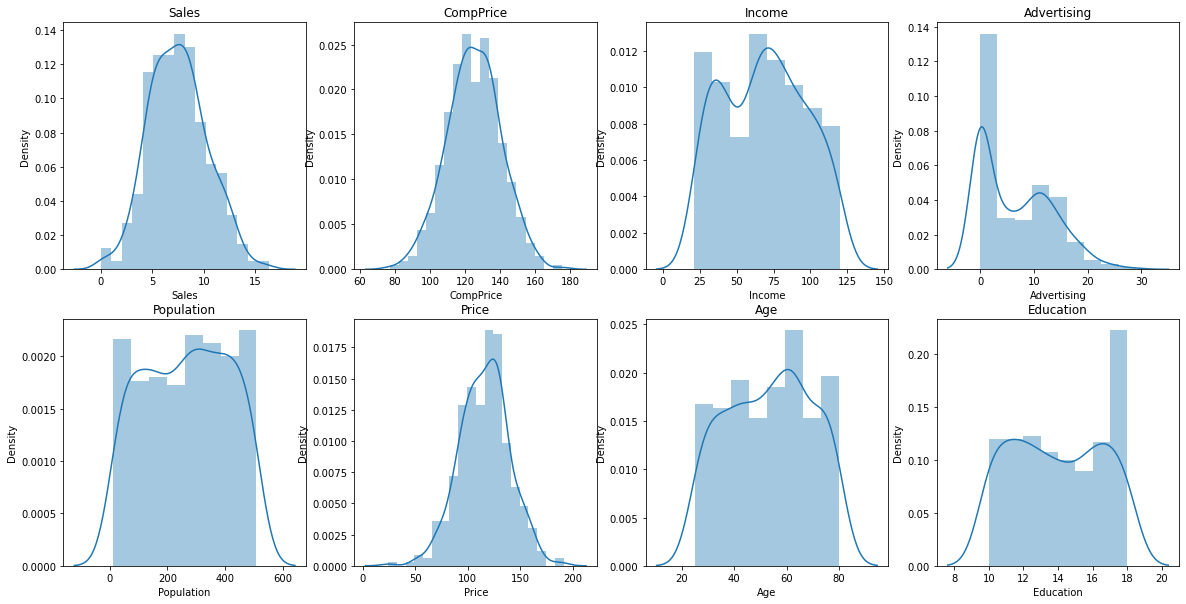

In [13]:
#plotting numeric data to get insights

fig,ax = plt.subplots(2,4, figsize = (20,10))

sns.distplot(data['Sales'],ax = ax[0,0])
sns.distplot(data['CompPrice'],ax = ax[0,1])
sns.distplot(data['Income'],ax = ax[0,2])
sns.distplot(data['Advertising'],ax = ax[0,3])
sns.distplot(data['Population'],ax = ax[1,0])
sns.distplot(data['Price'],ax = ax[1,1])
sns.distplot(data['Age'],ax = ax[1,2])
sns.distplot(data['Education'],ax = ax[1,3])
ax[0,0].set_title("Sales")
ax[0,1].set_title("CompPrice")
ax[0,2].set_title("Income")
ax[0,3].set_title("Advertising")
ax[1,0].set_title("Population")
ax[1,1].set_title("Price")
ax[1,2].set_title("Age")
ax[1,3].set_title("Education")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

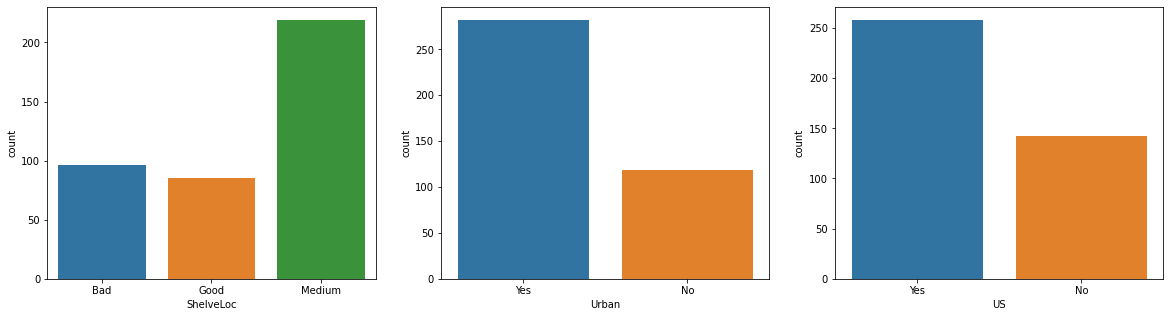

In [16]:
#Countplots for non-numeric data
fig,ax = plt.subplots(1,3, figsize = (20,5))

sns.countplot(data['ShelveLoc'],ax = ax[0])
sns.countplot(data['Urban'],ax = ax[1])
sns.countplot(data['US'],ax = ax[2])
ax[0,0].set_title('ShelveLoc')
ax[0,1].set_title('Urban')
ax[0,2].set_title('US')

In [17]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
data['Sales'] = pd.cut( x = data['Sales'],bins = [0, 6, 12, 17], labels = ['Low','Medium', 'High'])
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


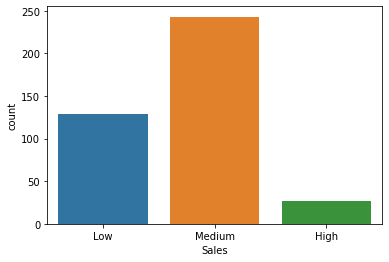

Medium    243
Low       129
High       27
Name: Sales, dtype: int64

In [18]:
#Visualizing categorised Sales data
sns.countplot(data['Sales'])
plt.show()
data["Sales"].value_counts()

In [19]:
#Assigning Positive Numbers for all Categorical Variables/col.
from sklearn.preprocessing import LabelEncoder
data["Sales"] = LabelEncoder().fit_transform(data["Sales"])
data["ShelveLoc"] = LabelEncoder().fit_transform(data["ShelveLoc"])
data["Urban"] = LabelEncoder().fit_transform(data["Urban"])
data["US"] = LabelEncoder().fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [20]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [21]:
X.head(3) ,X.tail(3)

(   CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
 0        138      73           11         276    120          0   42   
 1        111      48           16         260     83          1   65   
 2        113      35           10         269     80          2   59   
 
    Education  Urban  US  
 0         17      1   1  
 1         10      1   1  
 2         12      1   1  ,
      CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
 397        162      26           12         368    159          2   40   
 398        100      79            7         284     95          0   50   
 399        134      37            0          27    120          1   49   
 
      Education  Urban  US  
 397         18      1   1  
 398         12      1   1  
 399         16      1   1  )

In [22]:
#Splitting Dataset in train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

# Building C5.0 Model

In [32]:
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

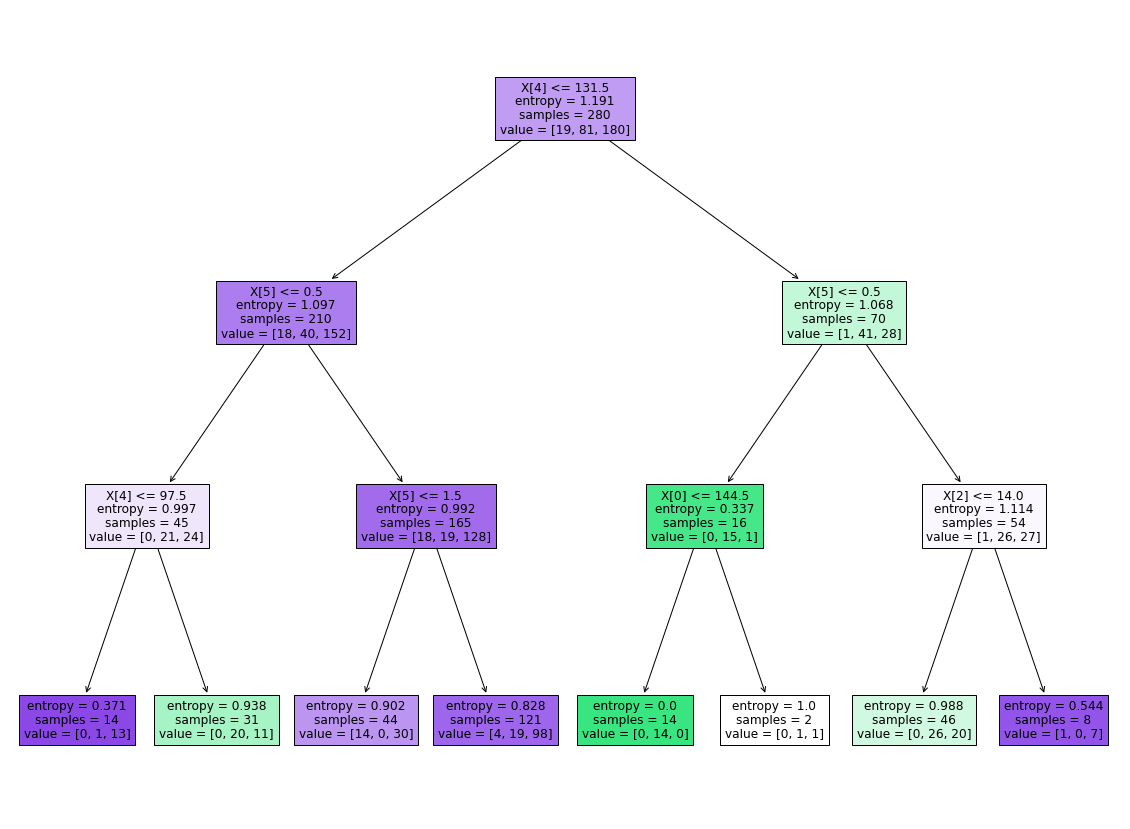

In [33]:
fig=plt.figure(figsize= (20,15))
tree.plot_tree(model_entropy,filled = True)
plt.show()

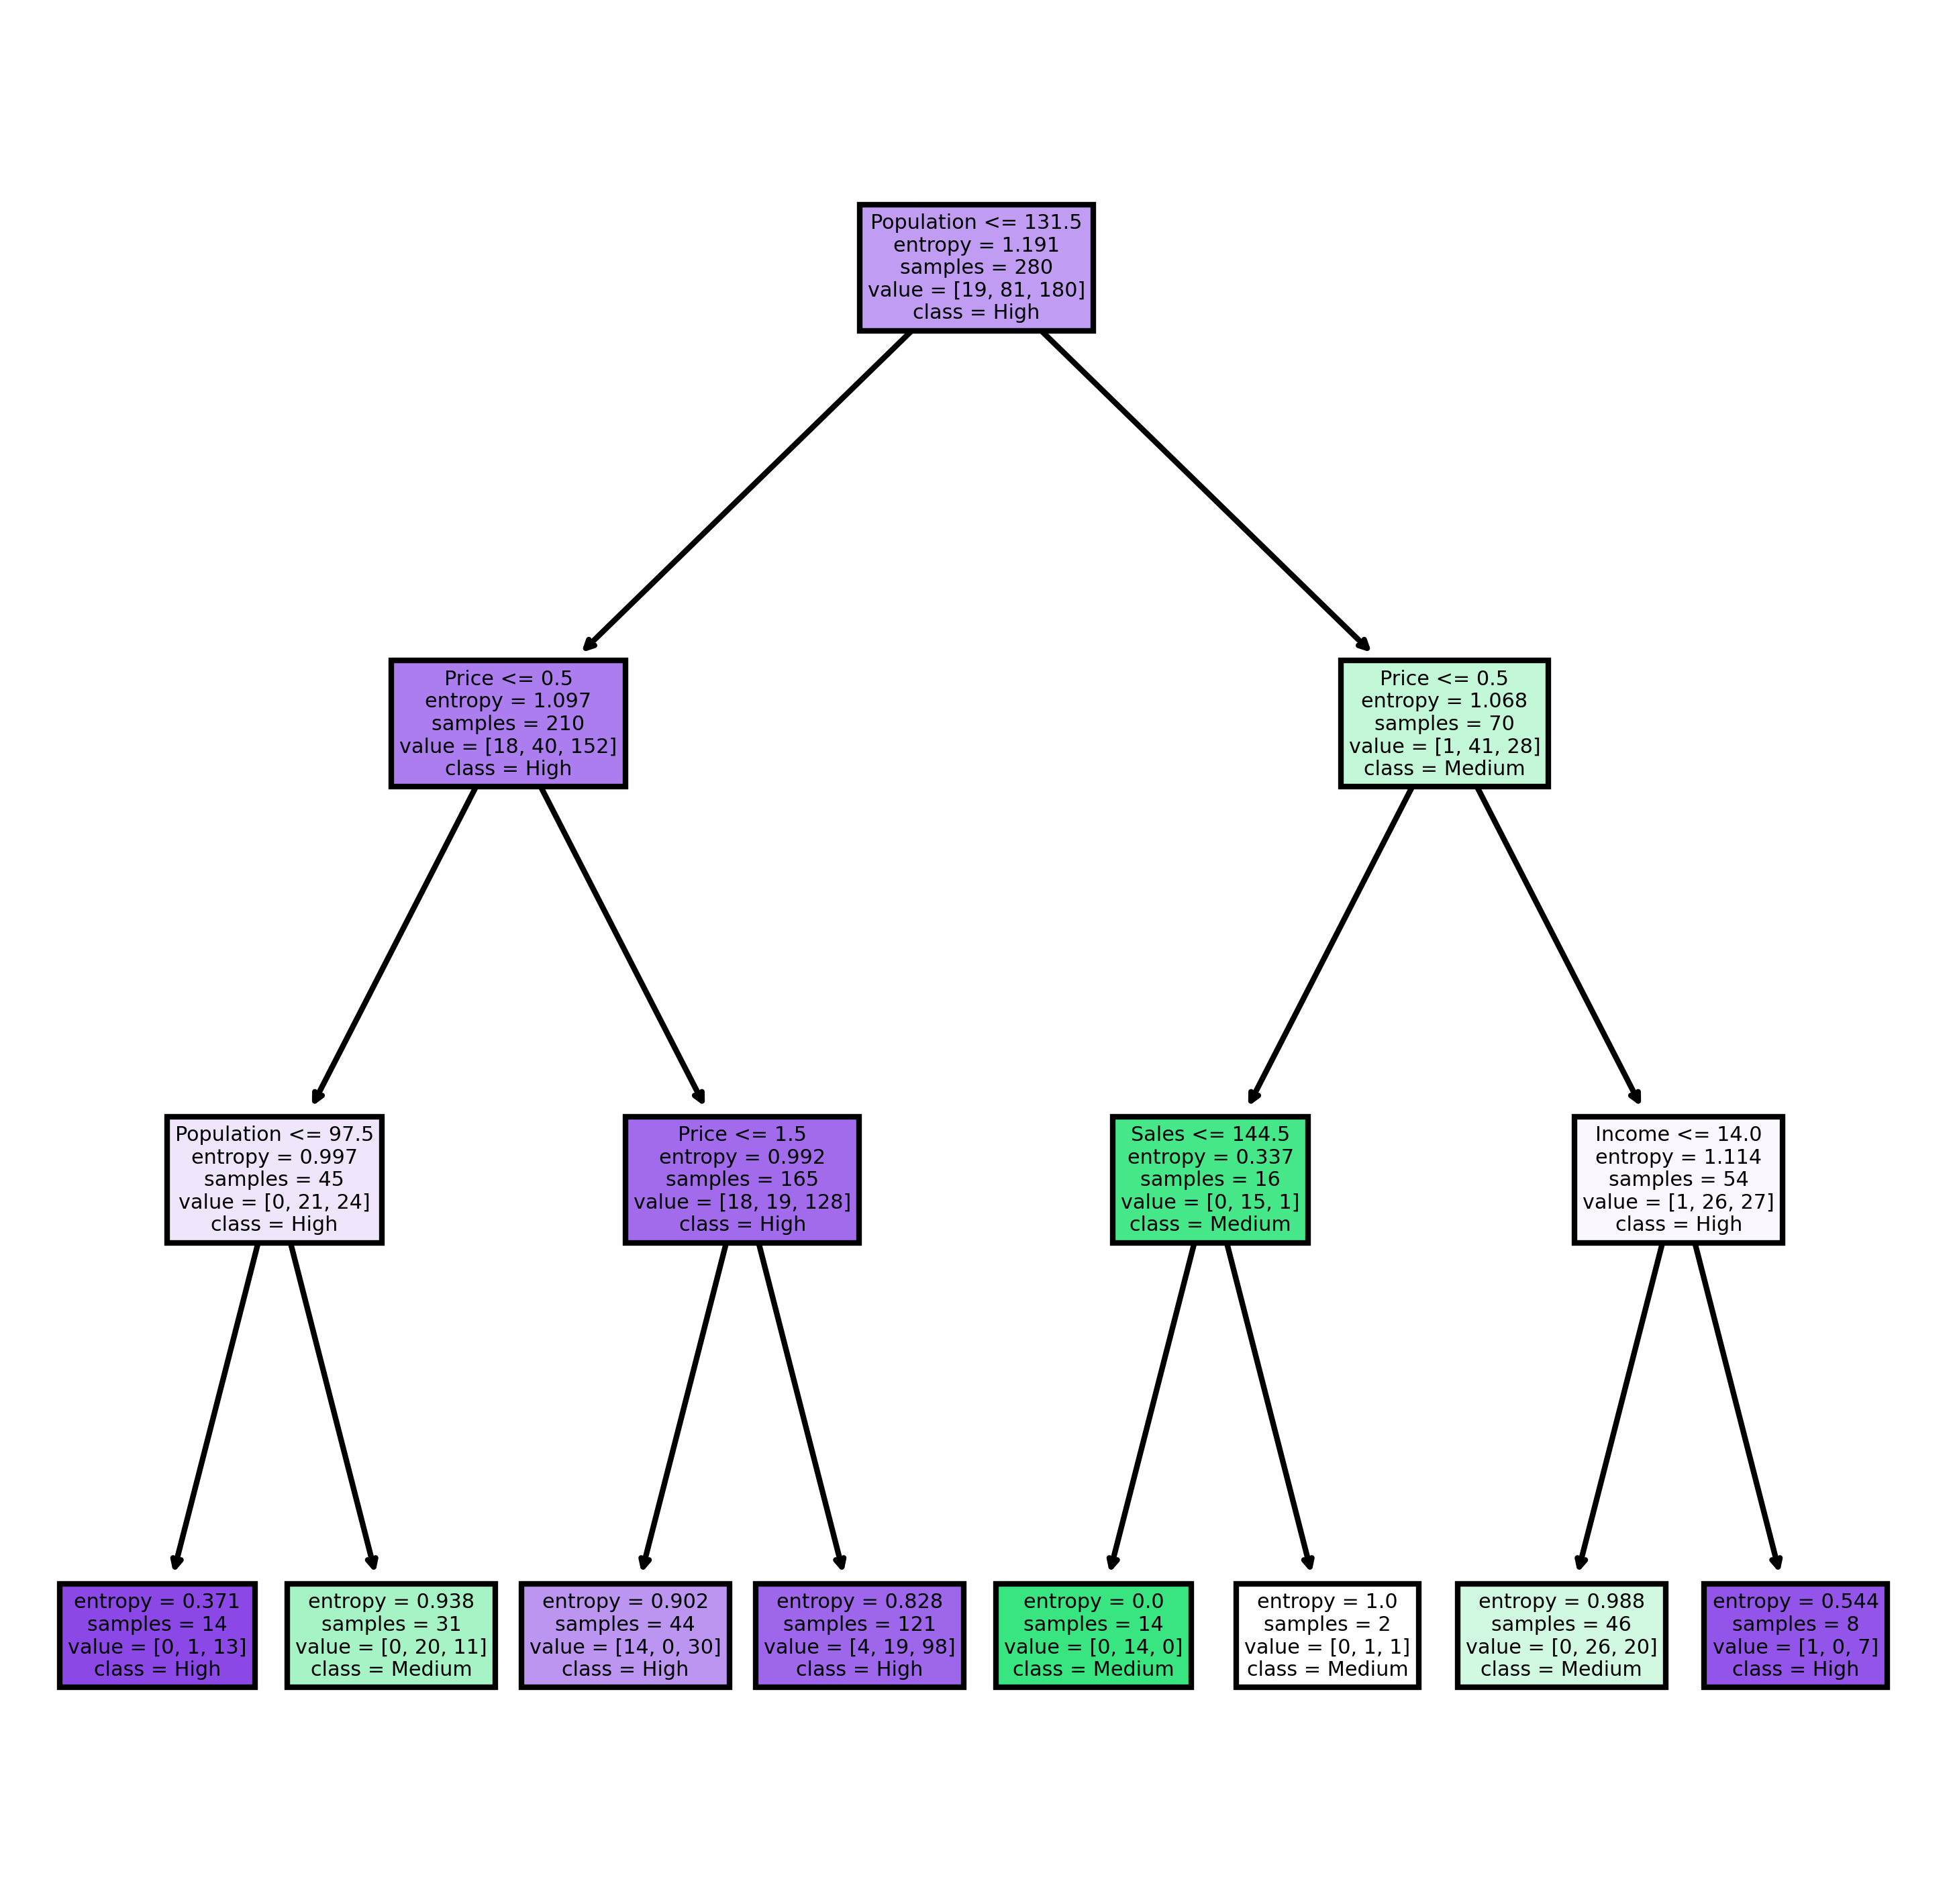

In [34]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()

# Model Predicition

In [43]:
preds = model_entropy.predict(x_test)
preds

array([1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2])

In [44]:
pd.Series(preds).value_counts()

2    78
1    42
dtype: int64

In [45]:
#Model Accuracy
accuracy_score(y_test,preds)

0.6333333333333333

In [46]:
print("Model Accuracy:-",(model_entropy.score(x_test,y_test))*100,"%")

Model Accuracy:- 63.33333333333333 %


# Building CART model

In [48]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

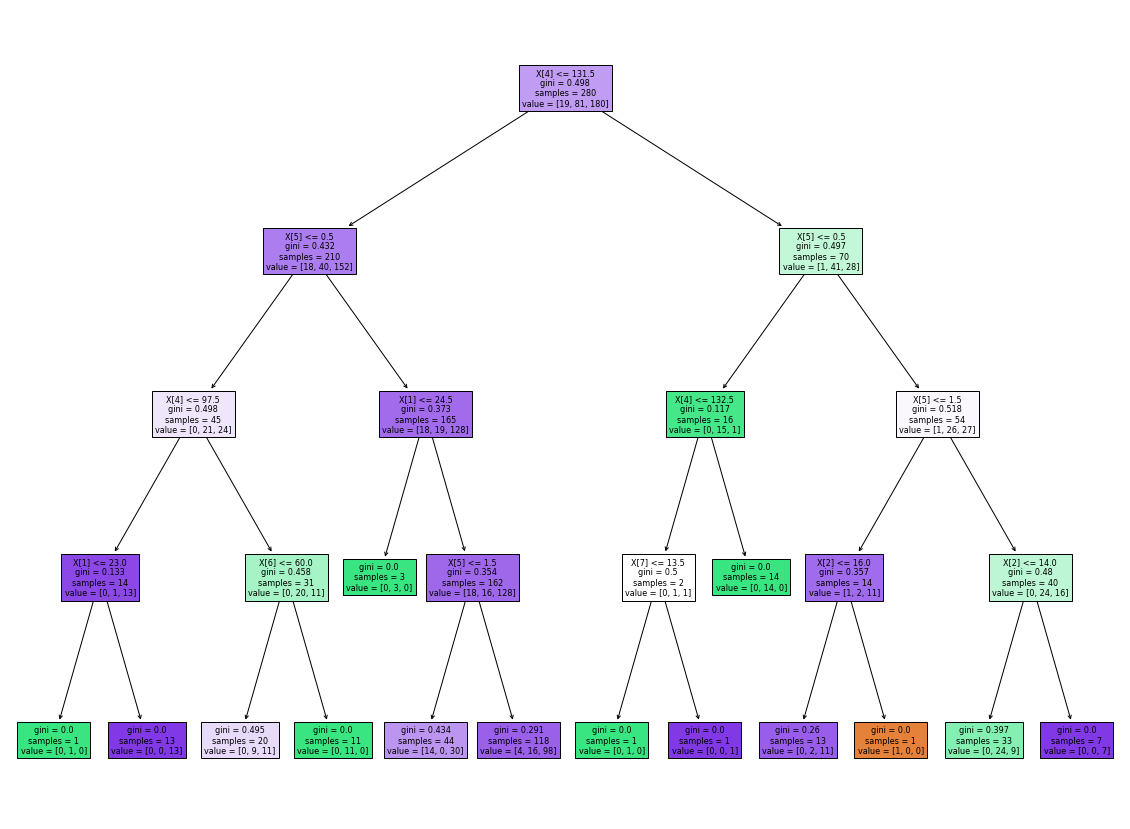

In [49]:
#plotting Decision tree
fig = plt.figure(figsize = (20,15))
tree.plot_tree(model_gini, filled = True)
plt.show()

# Model Prediction

In [53]:
#prediction test data
preds_x_test = model_gini.predict(x_test)

In [54]:
# Checking accuracy of model
accuracy_score(y_test,preds_x_test)

0.625

In [55]:
confusion_matrix(y_test,preds_x_test)

array([[ 0,  0,  8,  0],
       [ 0, 19, 29,  0],
       [ 0,  7, 56,  0],
       [ 0,  1,  0,  0]], dtype=int64)

In [56]:
pred_x_train = model_gini.predict(x_train)

In [57]:
# Checking accuracy of model
accuracy_score(y_train,pred_x_train)

0.8071428571428572

In [58]:
confusion_matrix(y_train,pred_x_train)

array([[  1,   0,  18],
       [  0,  54,  27],
       [  0,   9, 171]], dtype=int64)